In [1]:
# Basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import time

# Classification models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

# Vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Utilities and metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Preprocessing
import nltk
import re

# Download nltk resources
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rafael\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Exploração do Dataset

In [2]:
path = "../data/multiclass/"
df = pd.read_csv(path + "ecommerceDataset.csv", header=None)
df.dropna(inplace=True)
df = df.rename(columns={0: 'category', 1: 'description'})
df

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [3]:
print(df.info())
print(df['category'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 50424 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     50424 non-null  object
 1   description  50424 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None
category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: count, dtype: int64


## Preprocessamento do Dataset

In [4]:
stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'\d+', '', text) # remove digits
    text = re.sub(r'[^\w\s]', '', text)
    
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

df['description'] = df['description'].apply(preprocess_text)
df

,category,description
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood inch x inch sp...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic inc...
4,Household,incredible gift india wooden happy birthday un...
...,...,...
50420,Electronics,strontium microsd class gb memory card black m...
50421,Electronics,crossbeats wave waterproof bluetooth wireless ...
50422,Electronics,karbonn titanium wind w white karbonn titanium...
50423,Electronics,samsung guru fm plus smbed black colourblack c...


## Divisão do Dataset em treino e teste

In [5]:
features = df['description']
target = df['category']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=421)

## Definição dos vetorizadores, modelos e parâmetros para o GridSearch

In [6]:
vectorizers = [
    TfidfVectorizer(),
    CountVectorizer()
]

param_grids = [
    {
        'vectorizer': vectorizers,
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 150, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    {
        'vectorizer': vectorizers,
        'classifier': [SVC()],
        'classifier__C': [1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'vectorizer': vectorizers,
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.01, 1.0]
    },
    {
        'vectorizer': vectorizers,
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [1, 10],
    },
    {
        'vectorizer': vectorizers,
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7]
    },
    {
        'vectorizer': vectorizers,
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20]
    },
    {
        'vectorizer': vectorizers,
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [100, 150, 200],
        'classifier__max_depth': [3, 5, 7]
    },
    {
        'vectorizer': vectorizers,
        'classifier': [AdaBoostClassifier()],
        'classifier__n_estimators': [50, 100, 150]
    },
    {
        'vectorizer': vectorizers,
        'classifier': [SGDClassifier()],
        'classifier__alpha': [0.0001, 0.001]
    }
]

pipeline = Pipeline([
    ('vectorizer', 'passthrough'),
    ('classifier', 'passthrough')
])

## Execução do GridSearch

In [7]:
grid_search = GridSearchCV(pipeline, param_grids, cv=5, n_jobs=6, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 74 candidates, totalling 370 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', 'passthrough'),
                                       ('classifier', 'passthrough')]),
             n_jobs=4,
             param_grid=[{'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [None, 10, 20],
                          'classifier__n_estimators': [100, 150, 200],
                          'vectorizer': [TfidfVectorizer(), CountVectorizer()]},
                         {'classifier': [SVC()], 'classifier__C': [1, 10],
                          'classifi...
                          'classifier__n_estimators': [100, 150, 200],
                          'vectorizer': [TfidfVectorizer(), CountVectorizer()]},
                         {'classifier': [AdaBoostClassifier()],
                          'classifier__n_estimators': [50, 100, 150],
                          'vectorizer': [TfidfVectorizer(), CountVectorizer()]},
                         {'classifier': [SGDClassifier()],
                          'classifier__alpha': [0.0001, 0.001],
                          'vectorizer': [TfidfVectorizer(),
                                         CountVectorizer()]}],
             scoring='accuracy', verbose=2)

## Resultados finais e matriz de confusão

In [8]:
cv_results = grid_search.cv_results_

results_df = pd.DataFrame(cv_results)

results_df.to_csv('results/sklearn_multiclass1_results.csv', sep=';', index=False)

In [9]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest set classification report with best model:")
print(classification_report(y_test, y_pred, digits=4))

Best parameters found: {'classifier': SVC(), 'classifier__C': 10, 'classifier__kernel': 'rbf', 'vectorizer': TfidfVectorizer()}
Best cross-validation score: 0.9792508348677987

Test set classification report with best model:
                        precision    recall  f1-score   support

                 Books     0.9920    0.9817    0.9868      2404
Clothing & Accessories     0.9880    0.9857    0.9869      1754
           Electronics     0.9844    0.9720    0.9782      2143
             Household     0.9745    0.9889    0.9816      3784

              accuracy                         0.9830     10085
             macro avg     0.9847    0.9821    0.9834     10085
          weighted avg     0.9831    0.9830    0.9830     10085



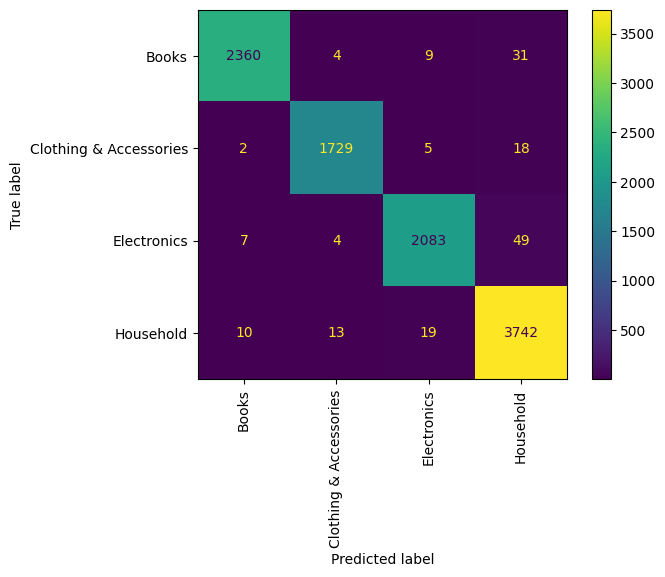

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')

In [11]:
import pickle
# Save the model with pickle
filename = 'models/sklearn_multiclass1_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)